<h1 align=center><font size = 7>Data mobile price 2020 analysis</font></h1>

The target of this notebook is compare the price of 1GB of data mobile worldwide, and especially analyze how Spain is positioned in the global rank and european countries.

The analysis is based on the data provided by www.cable.co.uk, who in the month of May published the comparison of 228 countries. For futher details, the following information is avaiable for your consultation:
<ul>

<li type="disc"><a href="https://s3-eu-west-1.amazonaws.com/assets.cable.co.uk/mobile-data-cost/global-mobile-data-price-comparison-2020.xlsx">Original dataset</a></il>

<li type="disc"><a href="https://s3-eu-west-1.amazonaws.com/assets.cable.co.uk/mobile-data-cost/1gb-mobile-data-research-press-release.pdf">Cable.co.uk analysis</a></il>

<li type="disc"><a href="https://s3-eu-west-1.amazonaws.com/assets.cable.co.uk/mobile-data-cost/global-broadband-pricing-study-2020-methodology.pdf">Cable.co.uk methodology</a></il>

</ul>

In addition, this notebook will be compared with 2019 data, obtained from the Kaggle website through <a href="https://www.kaggle.com/nulldata/worldwide-mobile-data-pricing">this link</a>.

__Note:__ Although the data used came from Cable.co.uk, the analysis tasks for this notebook have been carried out entirely by __Alejandro Velázquez Portas__ (<a href="https://www.linkedin.com/in/alexvelazquezp/">LinkedIn profile</a>). Take this into account when reproducing or citing its content.

# 1. Exploring datasets <a id="0"></a>

## 1.1 2020 data <a id="2"></a>

We start importing the data from the last year:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_excel("global-mobile-data-price-comparison-2020.xlsx", index_col=0)
prices.head()

,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date
Rank,,,,,,,,,,,,,
1,IN,India,ASIA (EX. NEAR EAST),60,6.656667,INR,0.013131,0.087409,1.625000,0.021338,209.090909,2.745598,2020-02-14
2,IL,Israel,NEAR EAST,17,0.399000,ILS,0.284986,0.113710,0.226667,0.064597,1.326667,0.378082,2020-02-14
3,KG,Kyrgyzstan,CIS (FORMER USSR),15,16.666667,KGS,0.012441,0.207352,7.666667,0.095382,46.428571,0.577624,2020-02-17
4,IT,Italy,WESTERN EUROPE,42,0.399583,EUR,1.084990,0.433544,0.080000,0.086799,6.990000,7.584080,2020-02-14
5,UA,Ukraine,CIS (FORMER USSR),12,12.500000,UAH,0.036976,0.462196,6.666667,0.246505,40.000000,1.479028,2020-02-24


The data has already been previously checked by Cable.co.uk, so this time there is not necessary to perform data cleaning operations.

Also remark that within the imported data, these are already sorted as a ranking according to the average price of 1GB data mobile in ascending order (_Average price of 1GB (USD)_ column).

However, we can still do some tasks to make the handling easier, such as delete not relevant columns, simplifying names and converting the prices to Euro.

In [3]:
usd_to_eur = 0.85 # 25 ago. 8:45 UTC
prices = prices[["Name", "Continental region", "Average price of 1GB (USD)", "Cheapest 1GB for 30 days (USD)", "Most expensive 1GB (USD)"]]
prices.rename(columns={"Average price of 1GB (USD)": "Average price", "Cheapest 1GB for 30 days (USD)": "Cheapest", "Most expensive 1GB (USD)": "Most expensive"}, inplace=True)
prices["Average price"] *=  usd_to_eur 
prices["Cheapest"] *= usd_to_eur
prices["Most expensive"] *= usd_to_eur
prices.head()

,Name,Continental region,Average price,Cheapest,Most expensive
Rank,,,,,
1,India,ASIA (EX. NEAR EAST),0.074298,0.018137,2.333758
2,Israel,NEAR EAST,0.096653,0.054907,0.321370
3,Kyrgyzstan,CIS (FORMER USSR),0.176249,0.081075,0.490981
4,Italy,WESTERN EUROPE,0.368512,0.073779,6.446468
5,Ukraine,CIS (FORMER USSR),0.392867,0.209529,1.257174


The _Continental region_ column seems to contain a lot of zones. Let's check all this values. 

No grouping task will be carried out, because in some cases it would be necessary to carry out almost a detailed evaluation to make the right decision.

In [4]:
prices.groupby('Continental region')['Continental region'].count()

Continental region
ASIA (EX. NEAR EAST)    28
BALTICS                  3
CARIBBEAN               28
CENTRAL AMERICA          8
CIS (FORMER USSR)       11
EASTERN EUROPE          15
NEAR EAST               15
NORTHERN AFRICA          7
NORTHERN AMERICA         4
OCEANIA                 20
SOUTH AMERICA           13
SUB-SAHARAN AFRICA      47
WESTERN EUROPE          29
Name: Continental region, dtype: int64

Finally, let's check that the data types of each column are correct.

In [5]:
prices.dtypes

Name                   object
Continental region     object
Average price         float64
Cheapest              float64
Most expensive        float64
dtype: object

## 1.2 2019 data <a id="4"></a>

As we did with 2020 data, we are going to read and format the original data.

In [6]:
prices2019 = pd.read_excel("global-mobile-data-price-comparison-2020.xlsx", 
                           sheet_name="Previous year's data (2019)", 
                           index_col=0)
usd_to_eur = 0.85 # 25 ago. 8:45 UTC
prices2019 = prices2019[["Name", "Continental region", "Average price of 1GB (USD)", "Cheapest 1GB (USD)", "Most expensive 1GB (USD)"]]
prices2019.rename(columns={"Average price of 1GB (USD)": "Average price 2019", "Cheapest 1GB (USD)": "Cheapest", "Most expensive 1GB (USD)": "Most expensive"}, inplace=True)
prices2019["Average price 2019"] *=  usd_to_eur 
prices2019["Cheapest"] *= usd_to_eur
prices2019["Most expensive"] *= usd_to_eur
prices2019.head()

,Name,Continental region,Average price 2019,Cheapest,Most expensive
Rank,,,,,
1,India,ASIA (EX. NEAR EAST),0.220120,0.020826,1.188869
2,Kyrgyzstan,CIS (FORMER USSR),0.228752,0.064731,0.406154
3,Kazakhstan,CIS (FORMER USSR),0.420220,0.242170,0.669730
4,Ukraine,CIS (FORMER USSR),0.437420,0.176217,1.173039
5,Rwanda,SUB-SAHARAN AFRICA,0.476542,0.033064,2.362363


# 2. Data analysis <a id="6"></a>

## 2.1 Cheapest country <a id="8"></a>

__India__ is the country with the lowest average price per GB. If we do not trust the ranking, we can check it by ourselves.

In [7]:
prices[prices['Average price'] == min(prices['Average price'])] 

,Name,Continental region,Average price,Cheapest,Most expensive
Rank,,,,,
1,India,ASIA (EX. NEAR EAST),0.074298,0.018137,2.333758


## 2.2 Most expensive country <a id="10"></a>

__Saint Helena__ is the country with the highest price. It is an African island located in the Atlantic Ocean, at 1,800 km. off the coast of Angola (+info: https://en.wikipedia.org/wiki/Saint_Helena).

In [8]:
prices[prices['Average price'] == max(prices['Average price'])] 

,Name,Continental region,Average price,Cheapest,Most expensive
Rank,,,,,
228,Saint Helena,SUB-SAHARAN AFRICA,44.621033,43.7104,54.638


## 2.3 Top 10 cheapest countries<a id="12"></a>

The following list includes the 10 cheapest countries in terms of cost per GB.

In [9]:
prices.head(10)

,Name,Continental region,Average price,Cheapest,Most expensive
Rank,,,,,
1,India,ASIA (EX. NEAR EAST),0.074298,0.018137,2.333758
2,Israel,NEAR EAST,0.096653,0.054907,0.321370
3,Kyrgyzstan,CIS (FORMER USSR),0.176249,0.081075,0.490981
4,Italy,WESTERN EUROPE,0.368512,0.073779,6.446468
5,Ukraine,CIS (FORMER USSR),0.392867,0.209529,1.257174
6,Kazakhstan,CIS (FORMER USSR),0.394404,0.256445,0.737651
7,Somalia,SUB-SAHARAN AFRICA,0.425000,0.154545,5.666667
8,Sri Lanka,ASIA (EX. NEAR EAST),0.435766,0.123115,5.523018
9,Russian Federation,CIS (FORMER USSR),0.438572,0.143013,3.718325


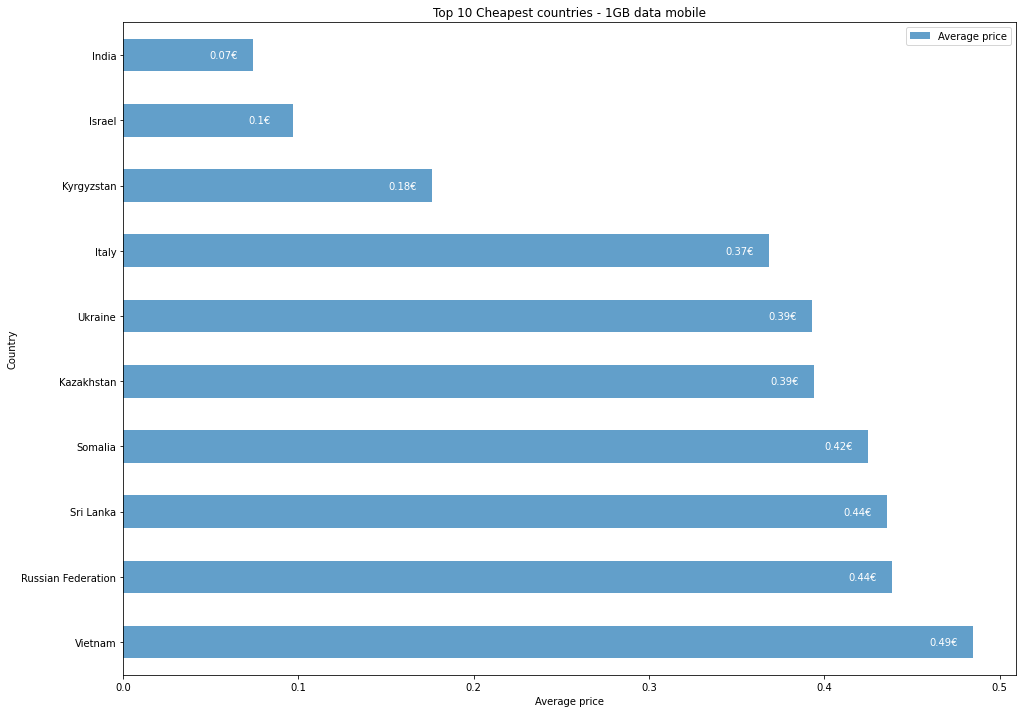

In [10]:
#Calculate top10 cheapest
top10cheap = prices.head(10)
top10cheap.set_index('Name', inplace=True)
top10cheap = top10cheap[['Average price']]
top10cheap.sort_values(['Average price'], ascending=False, axis=0, inplace=True)

#Print a barh
top10cheap.plot(kind='barh', alpha=0.7, figsize=(16, 12)) 
plt.xlabel('Average price')
plt.ylabel('Country')
plt.title('Top 10 Cheapest countries - 1GB data mobile')
for index,value in enumerate(top10cheap['Average price']): 
    label = str(round(value,2)) 
    plt.annotate(label+'€', xy=(value-0.025, index-0.05), color='white')
plt.show()

Grouping regions, the former Soviet countries are predominant in this ranking, followed by Asian ones. Note that there is only one country in Western Europe and no one in North America.

In [11]:
prices.head(10).groupby('Continental region')['Continental region'].count().sort_values(ascending=False)

Continental region
CIS (FORMER USSR)       4
ASIA (EX. NEAR EAST)    3
WESTERN EUROPE          1
SUB-SAHARAN AFRICA      1
NEAR EAST               1
Name: Continental region, dtype: int64

## 2.4 Top 10 most expensive countries<a id="14"></a>

The following list includes the 10 countries with the most expensive price

In [12]:
prices.sort_values("Average price", ascending=False).head(10)

,Name,Continental region,Average price,Cheapest,Most expensive
Rank,,,,,
228,Saint Helena,SUB-SAHARAN AFRICA,44.621033,43.710400,54.638000
227,Falkland Islands,SOUTH AMERICA,34.346439,22.897626,63.408810
226,Nauru,OCEANIA,25.902754,9.454673,29.644974
225,Bermuda,NORTHERN AMERICA,24.437500,4.250000,68.000000
224,São Tomé and Príncipe,SUB-SAHARAN AFRICA,24.023149,11.280435,94.003625
223,Malawi,SUB-SAHARAN AFRICA,23.295236,18.636189,23.295236
222,Benin,SUB-SAHARAN AFRICA,23.134434,0.420626,46.736230
221,Chad,SUB-SAHARAN AFRICA,19.830500,1.682504,70.104345
220,Cayman Islands,CARIBBEAN,19.590647,6.304400,61.426440


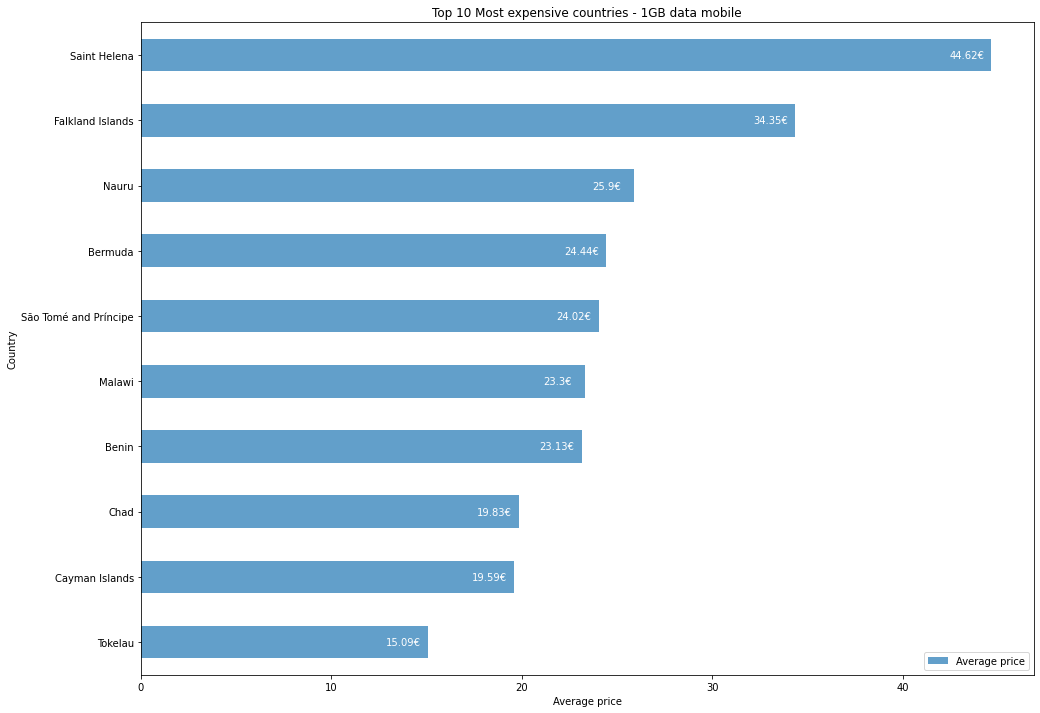

In [13]:
#Calculate top10 most expensive
top10exp = prices.tail(10)
top10exp.set_index('Name', inplace=True)
top10exp = top10exp[['Average price']]
top10exp.sort_values(['Average price'], ascending=True, axis=0, inplace=True)

#Print a barh
top10exp.plot(kind='barh', alpha=0.7, figsize=(16, 12)) 
plt.xlabel('Average price')
plt.ylabel('Country')
plt.title('Top 10 Most expensive countries - 1GB data mobile')
for index,value in enumerate(top10exp['Average price']): 
    label = str(round(value,2)) 
    plt.annotate(label+'€', xy=(value-2.2, index-0.05), color='white')
plt.show()

Mostly islands or sparsely populated countries, grouped by region, the African countries stand out.

In [14]:
prices.tail(10).groupby('Continental region')['Continental region'].count().sort_values(ascending=False)

Continental region
SUB-SAHARAN AFRICA    5
OCEANIA               2
SOUTH AMERICA         1
NORTHERN AMERICA      1
CARIBBEAN             1
Name: Continental region, dtype: int64

## 2.5 Price distribution<a id="16"></a>

Grouping prices in bands of 0.5 Euros, the number of countries in each band is as follows:

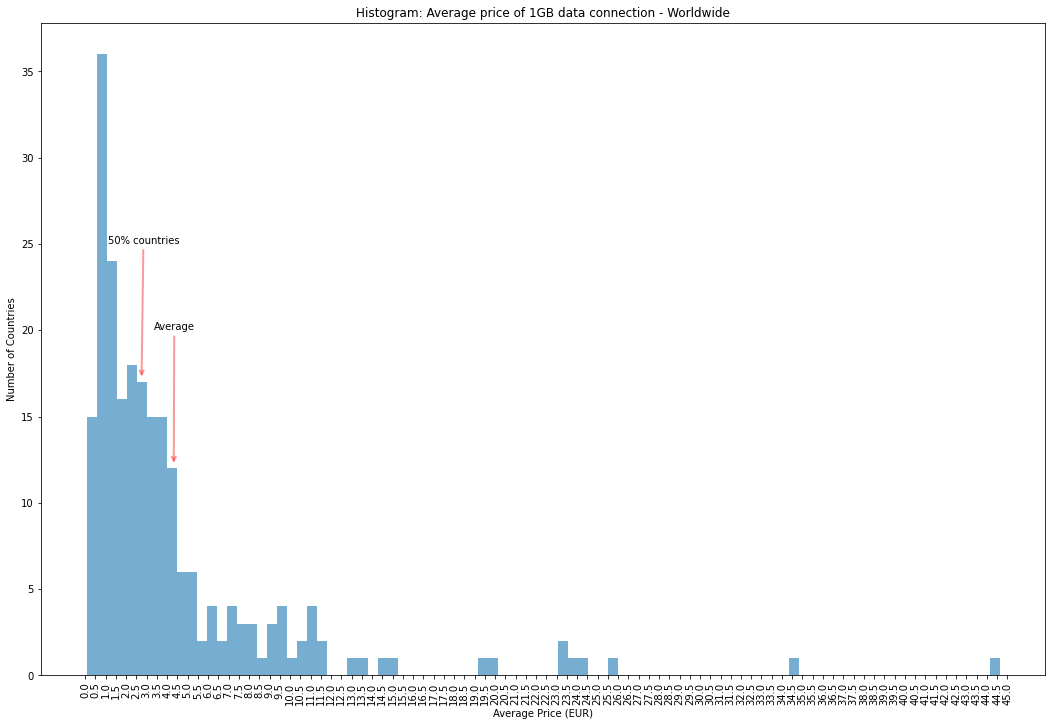

In [15]:
# Define x-axis, in 0.5€ steps
segments = int(prices['Average price'].max() // 0.5) + 1
bin_edges = []
for i in range(segments+1):
    bin_edges.append(0.5*i)

# Plots the histogram
prices['Average price'].plot(kind='hist', 
                             figsize=(18, 12), 
                             bins=len(bin_edges), 
                             alpha=0.6, 
                             xticks=bin_edges,
                             rot=90)
plt.title('Histogram: Average price of 1GB data connection - Worldwide') 
plt.ylabel('Number of Countries') 
plt.xlabel('Average Price (EUR)') 

# Annotate arrow for worldwide average
plt.annotate('Average',                      
             xy=(prices['Average price'].mean(), 12.2),             
             xytext=(3.35, 20),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for 50% countries
w50pc = prices['Average price'].iloc[prices['Name'].count() // 2]
plt.annotate('50% countries',                      
             xy=(w50pc, 17.2),             
             xytext=(1.1, 25),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

plt.show()

Grouping the number of countries in more generic price ranges, we can also obtain the following distribution (the group of Spain is highlighted):

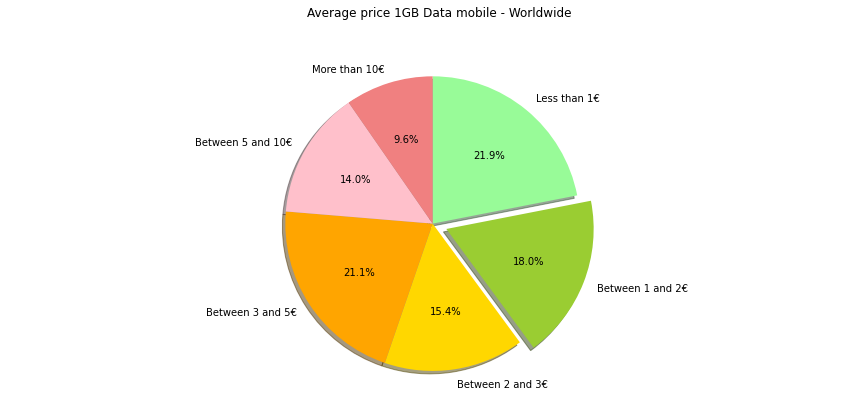

In [16]:
# Create a new dataframe for the pie chart representation
price_steps, steps_count = [1,2,3,5,10], []
steps_names = ['Less than 1€', 'Between 1 and 2€', 'Between 2 and 3€', 'Between 3 and 5€', 'Between 5 and 10€', 'More than 10€']
for i,val in enumerate(price_steps):
    count = (prices['Name'][prices['Average price'] < val]).count()
    count -= sum(steps_count)
    steps_count.append(count)
    if i == (len(price_steps)-1):
        steps_count.append((prices['Name'].count())-sum(steps_count))
pie_data = pd.DataFrame(list(zip(steps_names, steps_count)), columns=['Group',' '])
pie_data.set_index('Group', inplace=True)

# Plot data
colors_list = ['palegreen', 'yellowgreen', 'gold', 'orange', 'pink', 'lightcoral']
explode = [0, 0.1, 0, 0, 0, 0]
pie_data[' '].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,
                            counterclock=False,
                            shadow=True,   
                            explode=explode,
                            colors=colors_list
                            )

plt.title('Average price 1GB Data mobile - Worldwide', y=1.12) 
plt.axis('equal')  
plt.show()

If we represent worldwide values on a box plot, we find that many of the high values are considered outliers.

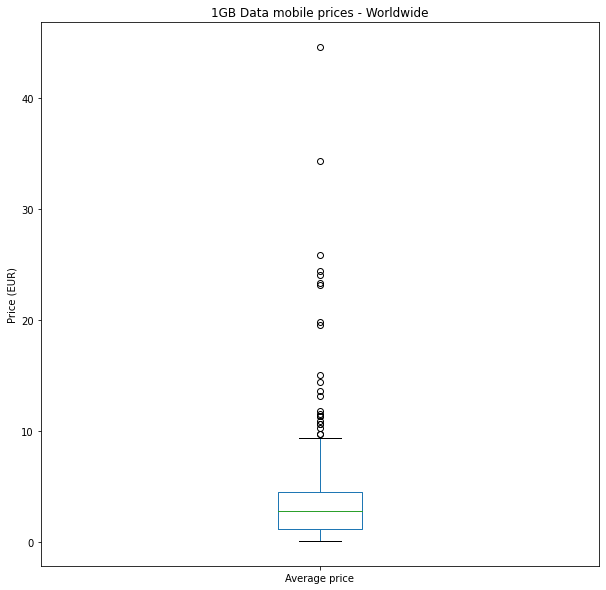

In [17]:
prices['Average price'].plot(kind='box', figsize=(10, 10))
plt.title('1GB Data mobile prices - Worldwide')
plt.ylabel('Price (EUR)')
plt.show()

In the previous representation, the values are the following:

In [18]:
prices[['Average price']].describe()

,Average price
count,228.000000
mean,4.327876
std,5.655158
min,0.074298
25%,1.175834
50%,2.755041
75%,4.532348
max,44.621033


## 2.6 Spain <a id="18"></a>

Spain is the __75th__ cheapest country in 1GB data mobile price. The average cost is __1.54€__

In [19]:
prices[prices['Name'] == 'Spain']

,Name,Continental region,Average price,Cheapest,Most expensive
Rank,,,,,
75,Spain,WESTERN EUROPE,1.537069,0.336618,11.791516


## 2.7 Europe<a id="20"></a>

Below is the list of European countries, including the regions of Western Europe, the Baltic countries and Eastern Europe.

In [20]:
europe = prices[(prices['Continental region'] == 'WESTERN EUROPE') | 
               (prices['Continental region'] == 'BALTICS') | 
               (prices['Continental region'] == 'EASTERN EUROPE')]
europe

,Name,Continental region,Average price,Cheapest,Most expensive
Rank,,,,,
4,Italy,WESTERN EUROPE,0.368512,0.073779,6.446468
18,Poland,EASTERN EUROPE,0.591404,0.027184,18.353926
29,Denmark,WESTERN EUROPE,0.676819,0.171884,2.089812
30,France,WESTERN EUROPE,0.691451,0.092132,92.131926
35,Monaco,WESTERN EUROPE,0.829925,0.553160,0.921780
39,Romania,EASTERN EUROPE,0.876129,0.553345,9.222415
43,Austria,WESTERN EUROPE,0.921627,0.137414,2.748280
46,Moldova,EASTERN EUROPE,0.952778,0.233197,3.731160
50,San Marino,WESTERN EUROPE,0.983724,0.983724,0.983724


Although the list is somewhat complex to follow, Spain is in the middle of the list. We are going to carry out some operations to simplify this list, such as redoing the ranking for Europe and calculating the differentials with respect to the Spanish price.

In [21]:
# Create the new rank
europe = europe.assign(Eur_rank=pd.Series(europe['Average price'].rank(ascending=True)))
# Calculate differential
spa_price = europe['Average price'][europe['Name'] == 'Spain'].iloc[0]
europe = europe.assign(Differential=pd.Series(europe['Average price'] - spa_price))
europe = europe.assign(Percent=pd.Series(((europe['Average price']*100)/spa_price)-100))
# Rename and correct types
europe.rename(columns={'Rank': 'World rank', 'Eur_rank': 'Eur rank', 'Diffential': 'Differential SPA', 'Percent': '%Diff SPA'}, inplace=True)
europe = europe.astype({'Eur rank': int, '%Diff SPA':int})
europe.set_index('Eur rank', inplace=True)
europe = europe[['Name', 'Continental region', 'Average price', 'Cheapest', 'Most expensive', 'Differential', '%Diff SPA']]
europe

,Name,Continental region,Average price,Cheapest,Most expensive,Differential,%Diff SPA
Eur rank,,,,,,,
1,Italy,WESTERN EUROPE,0.368512,0.073779,6.446468,-1.168557,-76
2,Poland,EASTERN EUROPE,0.591404,0.027184,18.353926,-0.945665,-61
3,Denmark,WESTERN EUROPE,0.676819,0.171884,2.089812,-0.860251,-55
4,France,WESTERN EUROPE,0.691451,0.092132,92.131926,-0.845619,-55
5,Monaco,WESTERN EUROPE,0.829925,0.553160,0.921780,-0.707144,-46
6,Romania,EASTERN EUROPE,0.876129,0.553345,9.222415,-0.660940,-43
7,Austria,WESTERN EUROPE,0.921627,0.137414,2.748280,-0.615442,-40
8,Moldova,EASTERN EUROPE,0.952778,0.233197,3.731160,-0.584291,-38
9,San Marino,WESTERN EUROPE,0.983724,0.983724,0.983724,-0.553345,-36


Now it is easier to draw conclusions from the list, such as that Spain is ranked 20th out of 47 countries, that the difference with Italy is more than one euro or that the price in German is double that of Spanish (+124%).

Trying to simplify the analysis even more, we can visualize the average price of all European countries in a histogram.

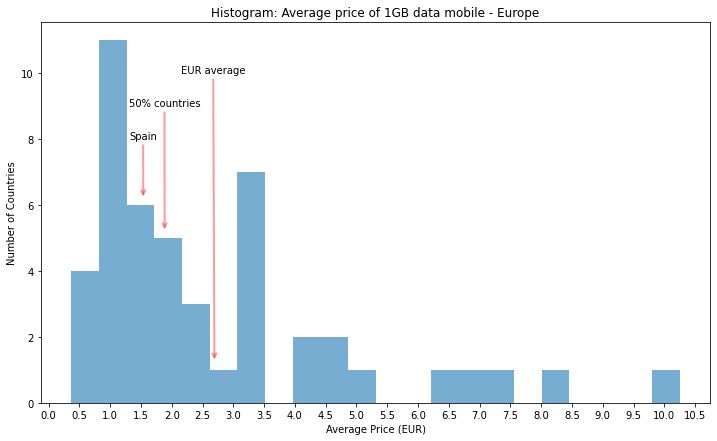

In [22]:
# Define x-axis, in 0.5 steps
segments = int(europe['Average price'].max() // 0.5) + 1
bin_edges = []
for i in range(segments+1):
    bin_edges.append(0.5 * i)

# Plots the histogram
europe['Average price'].plot(kind='hist', 
                             figsize=(12, 7), 
                             bins=len(bin_edges), 
                             alpha=0.6, 
                             xticks=bin_edges)
plt.title('Histogram: Average price of 1GB data mobile - Europe') 
plt.ylabel('Number of Countries') 
plt.xlabel('Average Price (EUR)') 

# Annotate arrow for Spain position
plt.annotate('Spain',                      
             xy=(spa_price, 6.2),             
             xytext=(1.31, 8),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for EUR average
plt.annotate('EUR average',                      
             xy=(europe['Average price'].mean(), 1.25),             
             xytext=(2.15, 10),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for 50% countries
eur_50pc = europe['Average price'].iloc[europe['Name'].count() // 2]
plt.annotate('50% countries',                      
             xy=(eur_50pc, 5.2),             
             xytext=(1.3, 9),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

plt.show()

As in the case of the worldwide analysis, we can visualize the percentages of each price group. As you can see in the comparison, the change is quite significant, especially due to the drastic reduction in high prices.

Now, the group from Spain (highlighted) is the largest.

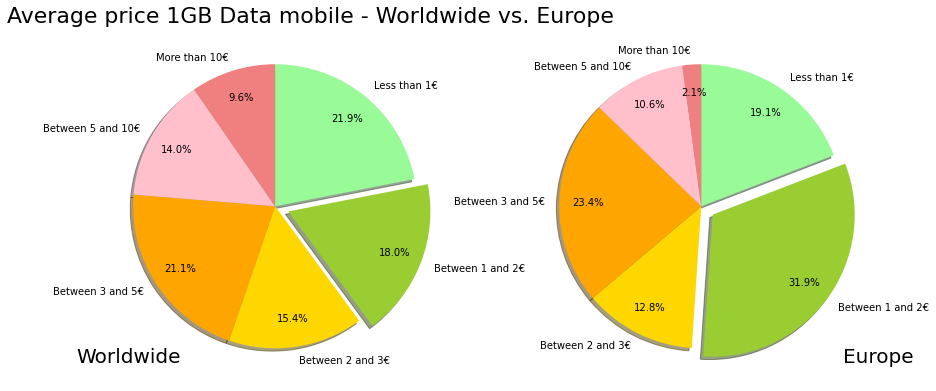

In [23]:
# Create a new dataframe for the pie chart representation
price_steps, steps_count_w, steps_count_eur = [1,2,3,5,10], [], []
steps_names = ['Less than 1€', 'Between 1 and 2€', 'Between 2 and 3€', 'Between 3 and 5€', 'Between 5 and 10€', 'More than 10€']
for i,val in enumerate(price_steps):
    count_w = (prices['Name'][prices['Average price'] < val]).count()
    count_w -= sum(steps_count_w)
    count_eur = (europe['Name'][europe['Average price'] < val]).count()
    count_eur -= sum(steps_count_eur)
    steps_count_w.append(count_w)
    steps_count_eur.append(count_eur)
    if i == (len(price_steps)-1):
        steps_count_w.append((prices['Name'].count())-sum(steps_count_w))
        steps_count_eur.append((europe['Name'].count())-sum(steps_count_eur))
pie_data = pd.DataFrame(list(zip(steps_names, steps_count_w, steps_count_eur)), columns=['Group','',' '])
pie_data.set_index('Group', inplace=True)

# Plot data
colors_list = ['palegreen', 'yellowgreen', 'gold', 'orange', 'pink', 'lightcoral']
explode = [0, 0.1, 0, 0, 0, 0]
pie_data[['',' ']].plot(kind='pie',
                                      figsize=(14, 8),
                                      labels=steps_names,
                                      autopct='%1.1f%%', 
                                      startangle=90,
                                      counterclock=False,
                                      shadow=True,   
                                      explode=explode,
                                      colors=colors_list,
                                      pctdistance=0.8,
                                      subplots=True,
                                      legend=False
                                      )

plt.title('Average price 1GB Data mobile - Worldwide vs. Europe', x=-0.6, y=1, fontdict={'fontsize':22}) 
plt.annotate('Worldwide', xy=(-1,0), xytext=(-4.4,-1.1), fontsize=20)
plt.annotate('Europe', xy=(-1,0), xytext=(1,-1.1), fontsize=20)
plt.show()

If we represent European values on a box plot, we have far fewer outliers than in the worldwide case.

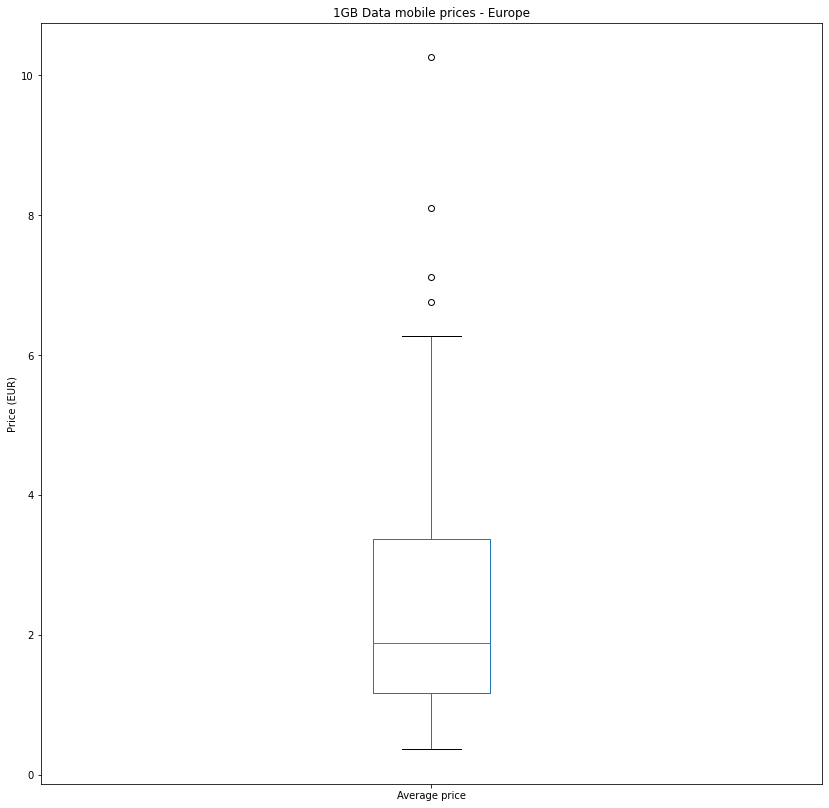

In [24]:
europe['Average price'].plot(kind='box', figsize=(14, 14))
plt.title('1GB Data mobile prices - Europe')
plt.ylabel('Price (EUR)')
plt.show()

Where the data considered are the following. Note that Spain is located between 25 and 50%, in addition to below the average.

In [25]:
europe[['Average price']].describe()

,Average price
count,47.000000
mean,2.693314
std,2.159155
min,0.368512
25%,1.168216
50%,1.884586
75%,3.377667
max,10.253788


## 2.8 USA<a id="22"></a>

What about the United States? We have visualized worldwide and European data and their comparisons with Spain, but in none of the queries we have come across this country. Let's see what position it occupies in the world ranking.

In [26]:
prices[prices['Name'] == 'United States']

,Name,Continental region,Average price,Cheapest,Most expensive
Rank,,,,,
188,United States,NORTHERN AMERICA,6.8,1.87,51.0


The position in the ranking is low, __188th__ of 228 (82% of countries have a lower price), and the average price is __6.8€__, compared to, for example, 2.7€ on average for European countries. We can get a better idea visualizing it on the histogram.

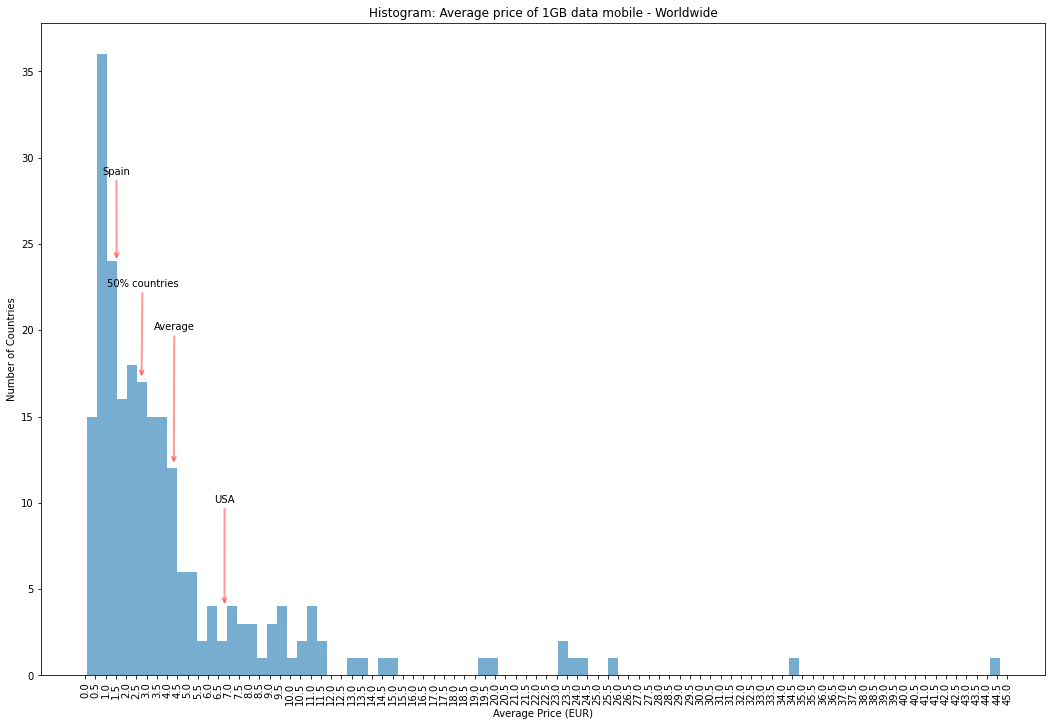

In [27]:
# Define x-axis, in 0.5€ steps
segments = int(prices['Average price'].max() // 0.5) + 1
bin_edges = []
for i in range(segments+1):
    bin_edges.append(0.5*i)

# Plots the histogram
prices['Average price'].plot(kind='hist', 
                             figsize=(18, 12), 
                             bins=len(bin_edges), 
                             alpha=0.6, 
                             xticks=bin_edges,
                             rot=90)
plt.title('Histogram: Average price of 1GB data mobile - Worldwide') 
plt.ylabel('Number of Countries') 
plt.xlabel('Average Price (EUR)') 

# Annotate arrow for Spain position
plt.annotate('Spain',                      
             xy=(spa_price, 24),             
             xytext=(0.85, 29),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for worldwide average
plt.annotate('Average',                      
             xy=(prices['Average price'].mean(), 12.2),             
             xytext=(3.35, 20),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for 50% countries
w50pc = prices['Average price'].iloc[prices['Name'].count() // 2]
plt.annotate('50% countries',                      
             xy=(w50pc, 17.2),             
             xytext=(1.05, 22.5),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for USA
usa_price = prices['Average price'][prices['Name'] == 'United States'].iloc[0]
w50pc = prices['Average price'].iloc[prices['Name'].count() // 2]
plt.annotate('USA',                      
             xy=(usa_price, 4),             
             xytext=(6.3, 10),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

plt.show()

# 3. 2019 comparison<a id="24"></a>

To compare, we can merge the 2019 and 2020 data:

In [28]:
compare = pd.merge(left=prices2019[['Name','Average price 2019']], 
                   right=prices[['Name','Average price']], 
                   left_on='Name', 
                   right_on='Name')
compare = compare.assign(Differential=pd.Series(compare['Average price'] - compare['Average price 2019']))
compare.rename(columns={'Average price': 'Average price 2020'}, inplace=True)
compare.head()

,Name,Average price 2019,Average price 2020,Differential
0,India,0.220120,0.074298,-0.145822
1,Kyrgyzstan,0.228752,0.176249,-0.052503
2,Kazakhstan,0.420220,0.394404,-0.025816
3,Ukraine,0.437420,0.392867,-0.044553
4,Rwanda,0.476542,1.259133,0.782591


We are going to do the first checks to get quick conclusions:

In [29]:
countries_num = compare['Name'].count()
drop = compare['Name'][compare['Differential'] < 0].count()
rise = compare['Name'][compare['Differential'] > 0].count()
equal = compare['Name'][compare['Differential'] == 0].iloc[0]
mean2019 = compare['Average price 2019'].mean()
mean2020 = compare['Average price 2020'].mean()
max_drop = compare['Differential'].min()
max_drop_country = compare['Name'][compare['Differential'] == max_drop].iloc[0]
max_rise = compare['Differential'].max()
max_rise_country = compare['Name'][compare['Differential'] == max_rise].iloc[0]
spa_price2019 = compare['Average price 2019'][compare['Name'] == 'Spain'].iloc[0]
print('Prices decreased in {} countries and raised in {}'.format(drop, rise))
print('{} is the only country with no price changes'.format(equal))
print('The average price in 2019 was {:.2f}€, meanwhile in 2020 it is {:.2f}€. Prices drop by {:.2f}€'.format(mean2019, mean2020, mean2019-mean2020))
print('The country with the biggest drop in prices has been {}, where prices drop by {:.2f}€'.format(max_drop_country, max_drop))
print('The country with the highest price increase has been {}, where prices rising by {:.2f}€'.format(max_rise_country, max_rise))
print('The price in Spain dropped from {:.2f}€ to {:.2f}€, a {:.1f}%'.format(spa_price2019, spa_price, ((spa_price-spa_price2019)/spa_price2019)*100))

Prices decreased in 195 countries and raised in 29
Chad is the only country with no price changes
The average price in 2019 was 6.90€, meanwhile in 2020 it is 4.24€. Prices drop by 2.65€
The country with the biggest drop in prices has been Equatorial Guinea, where prices drop by -45.09€
The country with the highest price increase has been Malawi, where prices rising by 20.24€
The price in Spain dropped from 3.22€ to 1.54€, a -52.3%


We can also draw some conclusions using the _describe_ method.

In [30]:
compare[['Average price 2019']].describe()

,Average price 2019
count,225.000000
mean,6.897664
std,7.550976
min,0.220120
25%,2.407535
50%,4.378026
75%,8.837165
max,55.951668


We can get more data from the countries where prices have risen. Many of them correspond to countries where telecommunications infrastructures are not yet widely deployed, although others such as the Czech Republic, Finland and Canada are a surprise.

In [31]:
compare[compare['Differential'] > 0].sort_values('Differential', ascending=False)

,Name,Average price 2019,Average price 2020,Differential
75,Malawi,3.051678,23.295236,20.243558
117,São Tomé and Príncipe,4.530975,24.023149,19.492174
210,Benin,17.838484,23.134434,5.295950
70,Madagascar,2.879277,7.486276,4.606999
105,Czech Republic,4.173011,6.757123,2.584113
88,Syria,3.514764,5.565375,2.050611
216,Nauru,23.908540,25.902754,1.994213
126,Central African Republic,5.127413,7.010434,1.883022
142,Barbados,6.129339,7.918767,1.789428
64,Mauritania,2.656167,3.934931,1.278764


The last year's price drop can be easily visualized by means of a histogram that compares both values. As can be seen, in 2020 prices are more grouped in low quantities and part of the highest values disappear.

Text(6, 26, '50% countries 2019')

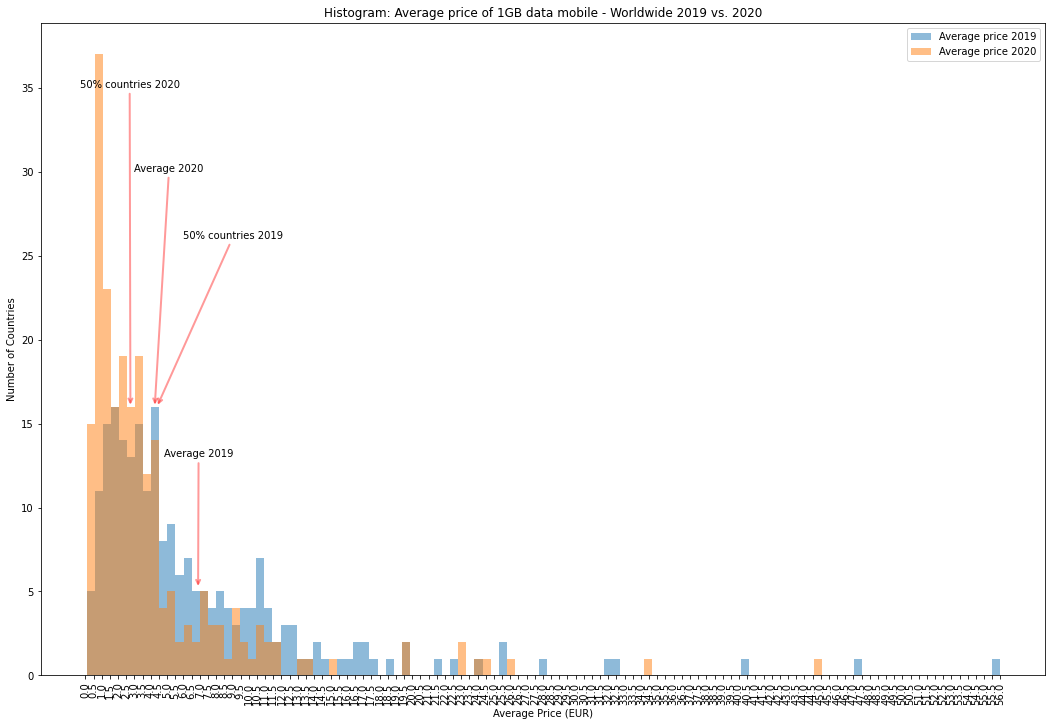

In [32]:
# Define x-axis, in 0.5€ steps
segments = int(compare['Average price 2019'].max() // 0.5) + 1
bin_edges = []
for i in range(segments+1):
    bin_edges.append(0.5*i)

# Plots the histogram
compare[['Average price 2019', 'Average price 2020']].plot(kind='hist', 
                             figsize=(18, 12), 
                             bins=len(bin_edges), 
                             alpha=0.5, 
                             xticks=bin_edges,
                             rot=90)
plt.title('Histogram: Average price of 1GB data mobile - Worldwide 2019 vs. 2020') 
plt.ylabel('Number of Countries') 
plt.xlabel('Average Price (EUR)') 

# Annotate arrow for worldwide average
plt.annotate('Average 2020',                      
             xy=(compare['Average price 2020'].mean(), 16),             
             xytext=(3, 30),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for 50% countries
plt.annotate('50% countries 2020',                      
             xy=(w50pc, 16),             
             xytext=(-0.35, 35),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for worldwide average
plt.annotate('Average 2019',                      
             xy=(compare['Average price 2019'].mean(), 5.2),             
             xytext=(4.8, 13),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

# Annotate arrow for 50% countries
w50pc2019 = compare['Average price 2019'].iloc[compare['Name'].count() // 2]
plt.annotate('50% countries 2019',                      
             xy=(w50pc2019, 16),             
             xytext=(6, 26),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', alpha=0.4, lw=2)
            )

Below is a visual comparison of the price groups between 2019 and 2020. The cheapest range is highlighted, in order to facilitate the visualization of the significant increase.

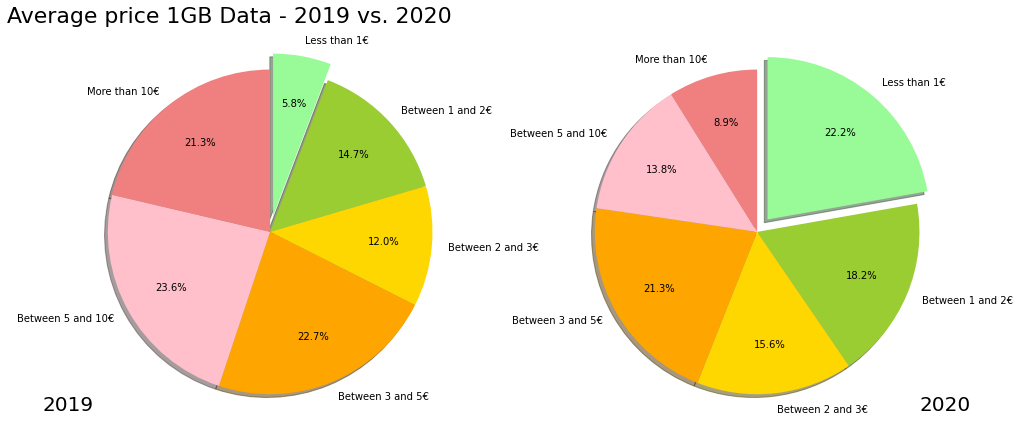

In [33]:
# Create a new dataframe for the pie chart representation
price_steps, steps_count2019, steps_count2020 = [1,2,3,5,10], [], []
steps_names = ['Less than 1€', 'Between 1 and 2€', 'Between 2 and 3€', 'Between 3 and 5€', 'Between 5 and 10€', 'More than 10€']
for i,val in enumerate(price_steps):
    count2019 = (compare['Name'][compare['Average price 2019'] < val]).count()
    count2019 -= sum(steps_count2019)
    count2020 = (compare['Name'][compare['Average price 2020'] < val]).count()
    count2020 -= sum(steps_count2020)
    steps_count2019.append(count2019)
    steps_count2020.append(count2020)
    if i == (len(price_steps)-1):
        steps_count2019.append((compare['Name'].count())-sum(steps_count2019))
        steps_count2020.append((compare['Name'].count())-sum(steps_count2020))
pie_data = pd.DataFrame(list(zip(steps_names, steps_count2019, steps_count2020)), columns=['Group','', ' '])
pie_data.set_index('Group', inplace=True)

# Plot data
colors_list = ['palegreen', 'yellowgreen', 'gold', 'orange', 'pink', 'lightcoral']
explode = [0.1, 0, 0, 0, 0, 0]
pie_data[['',' ']].plot(kind='pie',
                                figsize=(16, 8),
                                autopct='%1.1f%%', 
                                startangle=90,
                                counterclock=False,
                                shadow=True,   
                                explode=explode,
                                colors=colors_list, 
                                pctdistance=0.7,
                                subplots=True,
                                legend=False
                                )

plt.title('Average price 1GB Data - 2019 vs. 2020', x=-0.8, y=1, fontdict={'fontsize':22})  
plt.annotate('2019', xy=(-1,0), xytext=(-4.4,-1.1), fontsize=20)
plt.annotate('2020', xy=(-1,0), xytext=(1,-1.1), fontsize=20)
plt.show()

# 4. Conclusions<a id="26"></a>

The first important point of the data collected by Cable.co.uk is the great prices disparity that exists worldwide for the same service, ranging from a few euro cents to the maximum ceiling of 45€. In this sense, the infrastructures of each country play a fundamental and influential role in the final price.

In general terms, the average prices in Europe are lower than in the rest of the world, although they do not predominate in the first positions of the cheapest countries.

Spain, without becoming a country that stands out in the most economic positions, is positioned in a relatively low price range and with a clear downward trend, with a decrease of approximately 50% in the last year.

# 5. Future improvements<a id="28"></a>

Although the prices are all normalized to the same currency, the relationship with the GDP per capita of each of the countries has not been taken into account. Nevertheless some of the prices may seem low in absolute values, depending on the country's economy, they may be expensive.

Since only data from the last 2 years are available, there is not enough data to be able to carry out a future predictions of what the price may be in the next few years in each country. It is clear that they will continue to going down, but the future value cannot be quantified.